# Model Training & Results

In this Notebook, I will train and tune my models and display some outputs.

Outline:
- Selection of Evaluation Metrics
- Hyper-parameter Tuning w/ Grid Search
- Model Evalutation
- Conclusion

For this task, I have tried models including logistic regression, bayesian, decision tree, random forest, GBDT, Xgboost, and nueral networks. Based on my experience, I would say Xgboost and nueral networks can do at least as good as other models. So I didn't spend much time on playing with those naive methods.

In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics being used
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
with open('Data/processed_data_under', 'rb') as file:
    data = pickle.load(file)
y_true = data['y_test'].tolist()

## Selection of Evaluation Metrics

- **Accuracy**: Model accuracy is the most common metric for a classification problem. However, this particular problem-setting does not offer us enough information about our model. First, the data is highly biased. Second, this challenge's nature is to find card fraud, resulting in the actual loss of our bank. 
- **Recall**: We should care more about frauds, which indicates.(The isFraud = 1 if fraud). I will choose recall as another metric.
- **Specificity**: The ability to identify negative samples (isFraud = 0). We don't want many normal transactions being classified as frauds.
- **ROC-AUC**: The most common choice of metric, which considers both positive samples and negative samples. It is important in real-world cases since the ratio of positive to negative samples can vary. However, in this particular data challenge, the fixed ratio of isFraud will make *ROC-AUC over-estimate the model performance*.
- **Precision-Recall-AUC**: This PR-AUC is good because it cares about positive samples, particularly under the highly imbalanced setting.

## Hyper-parameter Tuning w/ Grid Search

Use grid search to tune hyper-parameters.

In [162]:
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score, make_scorer

**Instead of using default scores to do the grid search, I defined my own scoring function of pr_auc**

In [163]:
def my_custom_loss_func(model, X, y):
    pos_probs = model.predict_proba(X)
    precision, recall, _ = precision_recall_curve(y, pos_probs)
    pr_auc_score = auc(recall, precision)
    return pr_auc_score

In [164]:
def model_grid(data, params, clf, model_name):
        grid = GridSearchCV(estimator=clf, scoring = make_scorer(my_custom_loss_func, greater_is_better=True), param_grid=params, cv=5, verbose=2)
        grid.fit(data['x_train'].astype(float), data['y_train'].astype(int))
        with open('Data/model_results/%s'%model_name, 'wb') as file:
            pickle.dump(grid, file)
        return grid

### Decision Tree

In [165]:
params_dt = {
    'max_depth': [5, 7, 9, 11],
    'min_samples_leaf': [7, 9, 11],
    'max_leaf_nodes': [None, 3, 5, 7, 9]
}

dt = model_grid(data, params_dt, DecisionTreeClassifier(), 'dt')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9; total time=   0.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=11; total time=   0.2s
[CV] END max_depth=5, max_leaf_node

[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_leaf=11; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_leaf=11; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_leaf=11; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_leaf=11; total time=   0.1s
[CV] END ..max_depth=7, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=7, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=7, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=7, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=7, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=7, max_leaf_nodes=5, min_samples_leaf=9; total time=   0.1s
[CV] END ..max_depth=7, max_leaf_nodes=5, min_samples_leaf=9; total time=   0.1s
[CV] END ..max_depth=7, max_leaf_nodes=5, min_samples_leaf=9; total time=   0.1s
[CV] END ..max_depth=7, max_

[CV] END ..max_depth=9, max_leaf_nodes=7, min_samples_leaf=9; total time=   0.1s
[CV] END ..max_depth=9, max_leaf_nodes=7, min_samples_leaf=9; total time=   0.1s
[CV] END .max_depth=9, max_leaf_nodes=7, min_samples_leaf=11; total time=   0.1s
[CV] END .max_depth=9, max_leaf_nodes=7, min_samples_leaf=11; total time=   0.1s
[CV] END .max_depth=9, max_leaf_nodes=7, min_samples_leaf=11; total time=   0.1s
[CV] END .max_depth=9, max_leaf_nodes=7, min_samples_leaf=11; total time=   0.1s
[CV] END .max_depth=9, max_leaf_nodes=7, min_samples_leaf=11; total time=   0.1s
[CV] END ..max_depth=9, max_leaf_nodes=9, min_samples_leaf=7; total time=   0.2s
[CV] END ..max_depth=9, max_leaf_nodes=9, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=9, max_leaf_nodes=9, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=9, max_leaf_nodes=9, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=9, max_leaf_nodes=9, min_samples_leaf=7; total time=   0.1s
[CV] END ..max_depth=9, max_

### Logistic Regression

In [167]:
params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.05, 0.1, 0.5, 1, 3, 5],
    'fit_intercept': [True, False],
    'n_jobs': [-1]
}

lr = model_grid(data, params_lr, LogisticRegression(tol=0.01, solver='liblinear'), 'lr')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.2s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.1s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.1s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.1s
[CV] END ..C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.1s
[CV] END .C=0.05, fit_intercept=False, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END .C=0.05, fit_intercept=False, n_jobs=-

[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.3s
[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.3s
[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.3s
[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.3s
[CV] END .....C=5, fit_intercept=True, n_jobs=-1, penalty=l2; total time=   0.2s
[CV] END ....C=5, fit_intercept=False, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END ....C=5, fit_intercept=False, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END ....C=5, fit_intercept=False, n_jobs=-1, penalty=l1; total time=   0.1s
[CV] END ....C=5, fit_interc

### SVM

SVM works very slow even if I scale the data correspondingly, especially with gaussian kernels. Since SVM did not perform better than other models, I will not show the grid search of svm here. I use a linear SVC here to accelerate. But I also tried poly and rbf kernels. <br>
**I omit some tuning process of this SVM model here, because it is really slow**

In [273]:
params_svm = {
    'penalty': ['l1', 'l2'],
    'C': [1.0, 5, 10],
    
}
svm = model_grid(data, params_svm, LinearSVC(dual = False), 'svm')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..................................C=1.0, penalty=l1; total time=   2.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   2.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   1.9s
[CV] END ..................................C=1.0, penalty=l1; total time=   1.9s
[CV] END ..................................C=1.0, penalty=l1; total time=   1.7s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.5s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.7s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.6s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.6s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.8s
[CV] END ....................................C=5, penalty=l1; total time=   1.9s
[CV] END ....................................C=5,

In [211]:
# params_svm = {
#     'C': [0.01, 0.05, 0.1, 0.5, 1, 5],
#     'gamma': ['scale', 'auto'],
#     'kernel': ['poly', 'rbf'],
#     'degree': [1, 2, 3, 4, 5]
# }
# svm = model_grid(data, params_svm, SVC(probability=True), 'svm')

### Random Forest

In [35]:
params_rf = {
    'n_estimators': [50, 100, 300, 500],
    'max_depth': [3, 5],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 5, 10],
    'oob_score': [True, False]
}

rf = model_grid(data, params_rf, RandomForestClassifier(), 'rf')

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=False; total time=   0.9s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=False; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=False; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=False; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=False; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_

[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=False; total time=   2.5s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=False; total time=   2.6s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=True; total time=   5.5s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=True; total time=   5.4s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=True; total time=   5.4s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=True; total time=   5.5s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_sampl

[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5

[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, oob_score=False; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, oob_score=False; total time=   0.9s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=True; total time=   3.2s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=True; total time=   3.3s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=True; total time=   3.3s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=True; total time=   3.2s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_sampl

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, oob_score=True; total time=   5.3s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, oob_score=True; total time=   5.4s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, oob_score=True; total time=   5.2s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, oob_score=False; total time=   4.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, oob_score=False; total time=   4.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, oob_score=False; total time=   4.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=True; total time=   3.2s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=True; total time=   3.2s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=True; total time=   3.3s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=True; total time=   3.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=False; total time=   2.5s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=False; total time=   2.5s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=False; total time=   4.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=False; total time=   4.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=False; total time=   4.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=False; total time=   4.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_s

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_spli

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=False; total time=   3.5s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=False; total time=   3.6s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=False; total time=   3.6s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=False; total time=   3.6s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=False; total time=   3.6s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500, oob_score=True; total time=   7.5s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=False; total time=   6.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2,

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=False; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=False; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=False; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=False; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=False; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=False; total time=   3.5s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=False; total time=   3.6s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500, oob_score=True; total time=   7.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500, oob_score=True; total time=   7.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500, oob_score=True; total time=   7.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500, oob_score=True; total time=   7.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_sampl

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=False; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=False; total time=   1.3s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=True; total time=   4.4s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=True; total time=   4.4s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=True; total time=   4.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=True; total time=   4.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_sampl

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=True; total time=   7.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=True; total time=   7.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=True; total time=   7.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=False; total time=   5.9s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=False; total time=   5.9s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=False; total time=   7.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples

[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=False; total time=   3.3s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=False; total time=   3.1s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=False; total time=   3.3s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=False; total time=   3.4s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=False; total time=   3.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_s

[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500, oob_score=False; total time=   5.6s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_sampl

[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_s

[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300, oob_score=False; total time=   3.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_sampl

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_sample

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=False; total time=   1.8s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_sampl

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=False; total time=   5.3s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=False; total time=   5.2s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=False; total time=   5.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=False; total time=   5.2s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500, oob_score=False; total time=   5.7s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, m

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_sample

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=False; total time=   3.2s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=False; total time=   3.5s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=False; total time=   3.5s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=False; total time=   3.3s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, oob_score=False; total time=   3.4s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4,

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, oob_score=False; total time=   8.4s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=False; total time=   1.6s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=False; total time=   1.6s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=False; total time=   1.6s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=False; total time=   1.6s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=False; total time=   1.7s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2,

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=False; total time=   5.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_sampl

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=False; total time=   0.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.7s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_sampl

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, oob_score=False; total time=   8.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, oob_score=False; total time=   8.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, oob_score=False; total time=   8.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, oob_score=False; total time=   8.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, oob_score=False; total time=   8.7s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_s

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=False; total time=   0.9s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_sample

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300, oob_score=False; total time=   4.8s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300, oob_score=False; total time=   4.7s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300, oob_score=False; total time=   4.6s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300, oob_score=False; total time=   4.7s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300, oob_score=False; total time=   4.7s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_s

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500, oob_score=False; total time=   8.2s


### Xgboost

In [100]:
params_xgb = {
    'n_estimators': [90, 110, 130],
    'max_depth': [5, 6, 7],
    'learning_rate': [ 0.1, 0.2, 0.3, 0.5],
    'reg_lambda': [0.02, 0.05, 0.1]
}

xgb = model_grid(data, params_xgb, XGBClassifier(use_label_encoder=False), 'xgb')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[14:30:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=90, reg_lambda=0.02; total time=   2.5s
[14:30:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=90, reg_lambda=0.02; total time=   2.6s
[14:30:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed 

[CV] END learning_rate=0.1, max_depth=5, n_estimators=110, reg_lambda=0.05; total time=   3.6s
[14:31:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=110, reg_lambda=0.05; total time=   3.5s
[14:31:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=110, reg_lambda=0.05; total time=   3.3s
[14:31:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.1, max_depth=5, n_estimators=130, reg_lambda=0.1; total time=   4.3s
[14:33:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=130, reg_lambda=0.1; total time=   4.5s
[14:33:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=6, n_estimators=90, reg_lambda=0.02; total time=   5.4s
[14:33:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[CV] END learning_rate=0.1, max_depth=6, n_estimators=110, reg_lambda=0.05; total time=   5.0s
[14:34:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=6, n_estimators=110, reg_lambda=0.05; total time=   4.8s
[14:34:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=6, n_estimators=110, reg_lambda=0.05; total time=   5.8s
[14:34:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.1, max_depth=6, n_estimators=130, reg_lambda=0.1; total time=   5.8s
[14:36:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=6, n_estimators=130, reg_lambda=0.1; total time=   5.6s
[14:36:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=6, n_estimators=130, reg_lambda=0.1; total time=   5.2s
[14:36:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[CV] END learning_rate=0.1, max_depth=7, n_estimators=110, reg_lambda=0.02; total time=   5.1s
[14:38:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=7, n_estimators=110, reg_lambda=0.05; total time=   5.4s
[14:38:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=7, n_estimators=110, reg_lambda=0.05; total time=   5.0s
[14:38:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.1, max_depth=7, n_estimators=130, reg_lambda=0.1; total time=   6.4s
[14:40:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=7, n_estimators=130, reg_lambda=0.1; total time=   6.5s
[14:40:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=7, n_estimators=130, reg_lambda=0.1; total time=   7.2s
[14:41:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[CV] END learning_rate=0.2, max_depth=5, n_estimators=110, reg_lambda=0.02; total time=   3.5s
[14:42:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=5, n_estimators=110, reg_lambda=0.02; total time=   4.4s
[14:42:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=5, n_estimators=110, reg_lambda=0.05; total time=   4.4s
[14:42:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.2, max_depth=5, n_estimators=130, reg_lambda=0.1; total time=   4.0s
[14:43:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=5, n_estimators=130, reg_lambda=0.1; total time=   4.0s
[14:43:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=5, n_estimators=130, reg_lambda=0.1; total time=   4.8s
[14:43:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[CV] END learning_rate=0.2, max_depth=6, n_estimators=110, reg_lambda=0.02; total time=   4.5s
[14:45:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=6, n_estimators=110, reg_lambda=0.02; total time=   5.2s
[14:45:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=6, n_estimators=110, reg_lambda=0.02; total time=   4.9s
[14:45:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.2, max_depth=6, n_estimators=130, reg_lambda=0.05; total time=   4.9s
[14:46:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=6, n_estimators=130, reg_lambda=0.1; total time=   5.2s
[14:46:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=6, n_estimators=130, reg_lambda=0.1; total time=   5.2s
[14:47:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objectiv

[CV] END learning_rate=0.2, max_depth=7, n_estimators=110, reg_lambda=0.02; total time=   6.2s
[14:48:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=7, n_estimators=110, reg_lambda=0.02; total time=   5.6s
[14:48:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=7, n_estimators=110, reg_lambda=0.02; total time=   5.2s
[14:48:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.2, max_depth=7, n_estimators=130, reg_lambda=0.05; total time=   6.0s
[14:51:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=7, n_estimators=130, reg_lambda=0.05; total time=   6.3s
[14:51:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=7, n_estimators=130, reg_lambda=0.1; total time=   6.7s
[14:51:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objecti

[CV] END learning_rate=0.3, max_depth=5, n_estimators=110, reg_lambda=0.02; total time=   4.0s
[14:52:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=5, n_estimators=110, reg_lambda=0.02; total time=   3.6s
[14:52:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=5, n_estimators=110, reg_lambda=0.02; total time=   3.7s
[14:52:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.3, max_depth=5, n_estimators=130, reg_lambda=0.05; total time=   4.5s
[14:54:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=5, n_estimators=130, reg_lambda=0.05; total time=   3.9s
[14:54:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=5, n_estimators=130, reg_lambda=0.05; total time=   4.6s
[14:54:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.3, max_depth=6, n_estimators=90, reg_lambda=0.1; total time=   3.6s
[14:55:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=6, n_estimators=110, reg_lambda=0.02; total time=   4.7s
[14:55:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=6, n_estimators=110, reg_lambda=0.02; total time=   4.6s
[14:55:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objectiv

[CV] END learning_rate=0.3, max_depth=6, n_estimators=130, reg_lambda=0.05; total time=   5.0s
[14:57:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=6, n_estimators=130, reg_lambda=0.05; total time=   5.5s
[14:57:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=6, n_estimators=130, reg_lambda=0.05; total time=   5.2s
[14:57:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.3, max_depth=7, n_estimators=90, reg_lambda=0.1; total time=   4.8s
[14:59:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=7, n_estimators=90, reg_lambda=0.1; total time=   4.1s
[14:59:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=7, n_estimators=110, reg_lambda=0.02; total time=   5.3s
[14:59:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 

[CV] END learning_rate=0.3, max_depth=7, n_estimators=130, reg_lambda=0.05; total time=   7.2s
[15:01:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=7, n_estimators=130, reg_lambda=0.05; total time=   6.8s
[15:01:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.3, max_depth=7, n_estimators=130, reg_lambda=0.05; total time=   6.4s
[15:01:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.5, max_depth=5, n_estimators=90, reg_lambda=0.1; total time=   3.1s
[15:02:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=90, reg_lambda=0.1; total time=   3.2s
[15:02:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=90, reg_lambda=0.1; total time=   3.3s
[15:03:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'b

[CV] END learning_rate=0.5, max_depth=5, n_estimators=130, reg_lambda=0.02; total time=   4.5s
[15:04:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=130, reg_lambda=0.05; total time=   4.7s
[15:04:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=130, reg_lambda=0.05; total time=   4.2s
[15:04:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.5, max_depth=6, n_estimators=90, reg_lambda=0.1; total time=   4.3s
[15:06:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=6, n_estimators=90, reg_lambda=0.1; total time=   4.6s
[15:06:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=6, n_estimators=90, reg_lambda=0.1; total time=   4.1s
[15:06:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'b

[CV] END learning_rate=0.5, max_depth=6, n_estimators=130, reg_lambda=0.02; total time=   5.4s
[15:07:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=6, n_estimators=130, reg_lambda=0.02; total time=   5.2s
[15:07:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=6, n_estimators=130, reg_lambda=0.05; total time=   5.7s
[15:08:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[CV] END learning_rate=0.5, max_depth=7, n_estimators=90, reg_lambda=0.1; total time=   4.8s
[15:09:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=7, n_estimators=90, reg_lambda=0.1; total time=   4.4s
[15:09:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=7, n_estimators=90, reg_lambda=0.1; total time=   4.4s
[15:10:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'b

[CV] END learning_rate=0.5, max_depth=7, n_estimators=130, reg_lambda=0.02; total time=   6.5s
[15:11:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=7, n_estimators=130, reg_lambda=0.02; total time=   6.9s
[15:12:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=7, n_estimators=130, reg_lambda=0.02; total time=   7.7s
[15:12:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

In [38]:
model_grids = [dt, lr, svm, rf, xgb]

results = {
    'dt': dt,
    'lr': lr,
    'rf': rf,
    'svm': svm,
    'xgboost': xgb,
}

with open('Data/model_results/result_dict', 'wb') as file:
    pickle.dump(results, file, protocol=4)

# Model Evalutation

In [185]:
# example of a precision-recall curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import precision_score

In [246]:
# Plot generating functions to not rewrite code

def plot_confusion(clf, X_test, y_pred, y_pred_prob=None, y_true=None):
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    tn, fp, fn, tp = conf.ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)

    print()
    print(f'Accuracy: {acc}')
    print(f'Specificity: ', specificity)
    print(f'Recall: ', recall)
    if y_pred_prob is not None:
        roc_auc = roc_auc_score(y_true, y_pred_prob)
        precision_, recall_, _ = precision_recall_curve(y_true, y_pred_prob)
        pr_auc_score = auc(recall_, precision_)
        print(f'ROC-AUC: {roc_auc}')
        print(f'PR-AUC: {pr_auc_score}')

    plot_confusion_matrix(clf, X_test, y_true)  


In [247]:
def show_model_result(grid_prama, data):
    clf = grid_prama.best_estimator_
    print(f'Cross validation score: {grid_prama.best_score_}')
    for key, value in grid_prama.best_params_.items():
        print(f'{key}: {value}')
    clf.fit(data['x_train'], data['y_train'])
    y_pred = clf.predict(data['x_test'])
    result = None
    try:
        y_pred_prob = clf.predict_proba(data['x_test'])[:,1]
        result = [y_true, y_pred_prob]
        plot_confusion(clf, data['x_test'], y_pred, y_pred_prob, data['y_test'])
    except:
        plot_confusion(clf, data['x_test'], y_pred, None, data['y_test'])
    return result

### Decision Tree

Cross validation score: nan
max_depth: 5
max_leaf_nodes: None
min_samples_leaf: 7

Accuracy: 0.6567565758650693
Specificity:  0.6559712856210572
Recall:  0.7068516912402428
ROC-AUC: 0.7469313589918083
PR-AUC: 0.05024940455507039


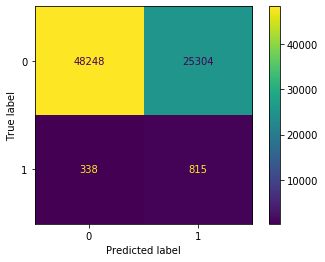

In [248]:
dec_res = show_model_result(dt, data)

* ROC-AUC of 0.74  is fine, but clearly it is over-estimating. The PR-AUC is low.

### Logistic Regression

Cross validation score: nan
C: 0.05
fit_intercept: True
n_jobs: -1
penalty: l1

Accuracy: 0.6628873569372866
Specificity:  0.6621301936045247
Recall:  0.7111882046834345
ROC-AUC: 0.7482395590208253
PR-AUC: 0.049057586629490155


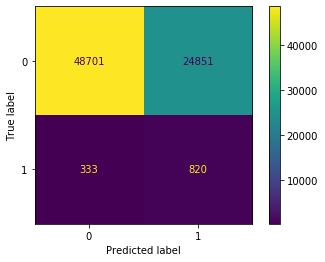

In [201]:
lr_res = show_model_result(lr, data)

* Not better than decision tree
* Many False Positive as well.

### Random Forest

Cross validation score: 0.6994163093487094
bootstrap: True
max_depth: 5
max_features: auto
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 50
oob_score: True

Accuracy: 0.6788032929522789
Specificity:  0.6784043941701109
Recall:  0.7042497831743278
ROC-AUC: 0.7634057707324868
PR-AUC: 0.057514560111351906


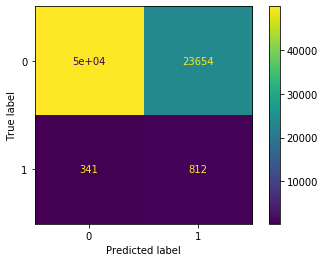

In [203]:
rf_res = show_model_result(rf, data)

* Random Forest is better than previous two

### SVM

Cross validation score: 0.6884390982260646
C: 1.0
penalty: l2

Accuracy: 0.6542667826785356
Specificity:  0.65332010006526
Recall:  0.7146574154379879


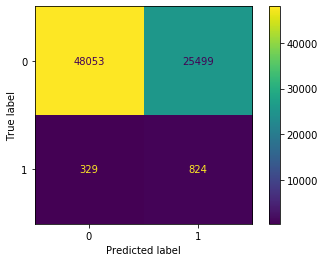

In [228]:
svm_res = show_model_result(svm, data)

* SVM is really slow when computing the dual problem, and the performance is just ok.

### XGBoost

Cross validation score: 0.7645369293763656
learning_rate: 0.2
max_depth: 6
n_estimators: 130
reg_lambda: 0.02
[17:55:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy: 0.7622381366709056
Specificity:  0.7619643245594954
Recall:  0.779705117085863
ROC-AUC: 0.8491072260728131
PR-AUC: 0.14226023665032056


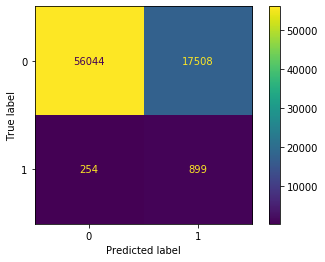

In [249]:
xgb_res = show_model_result(xgb, data)

- Without doubt, Xgboost is the best estimator so far, which aligns with my expectation. 

## Neural Network

It is natural to think about using NNs as a classifier, considering its power capturing complicated relationship among features, especially when the dimensional is high. However, this problem setting may not be the best fit for a neural network. It is neither pictures nor sequencial data, and the dimension of features is not that high. 

In [120]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [121]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [122]:
x_train, y_train = data['x_train'].astype('float32'), data['y_train'].astype('float32')
x_test, y_test = data['x_test'].astype('float32'), data['y_test'].astype('float32')

In [250]:
model = tf.keras.models.Sequential([
  # TODO: Add a layer here
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.1, input_shape=(128,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1, input_shape=(128,)),
  tf.keras.layers.Dense(64, activation='relu'),

  tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [251]:
history =  model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
632/632 [==============================] - 4s 5ms/step - loss: 1.0216 - accuracy: 0.6524 - precision: 0.6541 - recall_3: 0.6444 - auc_3: 0.7080 - val_loss: 0.6406 - val_accuracy: 0.6483 - val_precision: 0.0327 - val_recall_3: 0.7632 - val_auc_3: 0.7724
Epoch 2/15
632/632 [==============================] - 2s 4ms/step - loss: 0.6150 - accuracy: 0.6982 - precision: 0.6927 - recall_3: 0.7161 - auc_3: 0.7670 - val_loss: 0.5727 - val_accuracy: 0.7080 - val_precision: 0.0369 - val_recall_3: 0.7138 - val_auc_3: 0.7808
Epoch 3/15
632/632 [==============================] - 2s 4ms/step - loss: 0.5922 - accuracy: 0.7119 - precision: 0.7088 - recall_3: 0.7213 - auc_3: 0.7835 - val_loss: 0.6699 - val_accuracy: 0.6386 - val_precision: 0.0328 - val_recall_3: 0.7875 - val_auc_3: 0.7927
Epoch 4/15
632/632 [==============================] - 3s 4ms/step - loss: 0.5763 - accuracy: 0.7177 - precision: 0.7111 - recall_3: 0.7251 - auc_3: 0.7966 - val_loss: 0.5691 - val_accuracy: 0.6952 - val_preci

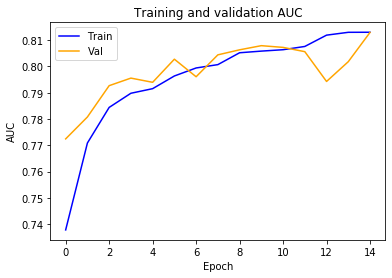

In [252]:
# A plotting function you can reuse
def plot(history):
    # The history object contains results on the training and test
    # sets for each epoch
    acc = history.history['auc_3']
    val_acc = history.history['val_auc_3']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get the number of epochs
    epochs = range(len(acc))

    plt.title('Training and validation AUC')
    plt.plot(epochs, acc, color='blue', label='Train')
    plt.plot(epochs, val_acc, color='orange', label='Val')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

plot(history)

In [253]:
y_predict = model.predict(x_test)
nn_res = [y_true, y_predict]

In [261]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
me = "test loss:,test accuracy:,test precision:,test recall:,test roc_auc:".split(',')
for i, j in zip(me, results): 
    print(i, j)
precision_, recall_, _ = precision_recall_curve(y_true, y_predict)
pr_auc_score = auc(recall_, precision_)
print('test pr_auc:',pr_auc_score)

Evaluate on test data
584/584 [==============================] - 1s 1ms/step - loss: 0.5510 - accuracy: 0.7269 - precision: 0.0409 - recall_3: 0.7441 - auc_3: 0.8129
test loss: 0.5509549379348755
test accuracy: 0.7269124984741211
test precision: 0.040927302092313766
test recall: 0.7441456913948059
test roc_auc: 0.812949001789093
test pr_auc: 0.11632441383296604


## AUC Plot

In [270]:
def plot_roc(models):
    for key, value in models.items():
        fpr, tpr, _ = roc_curve(value[0], value[1])
        sns.lineplot(x=fpr, y=tpr, label=key)

    ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
    ax.lines[len(models)].set_linestyle("--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')

In [271]:
def plot_pr(models):
        for key, value in models.items():
            precision, recall, _ = precision_recall_curve(value[0], value[1])
            sns.lineplot(x=recall, y=precision, label=key)
            
        naive_y = sum(y_true)/len(y_true)
        ax = sns.lineplot(x=[0, 0.5, 1], y=[naive_y, naive_y, naive_y])
        ax.lines[len(models)].set_linestyle("--")
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'PR Curve')
            


In [267]:
model_results = {
    'Decision Tree': dec_res,
    'Logistic Regression': lr_res,
    'Random Forest': rf_res,
    'XGBoost': xgb_res,
    'Neural Network': nn_res
}


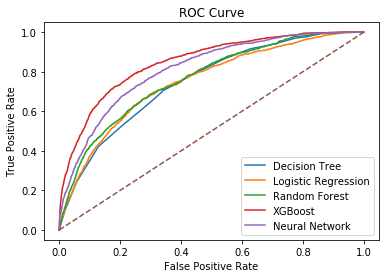

In [268]:
plot_roc(model_results)

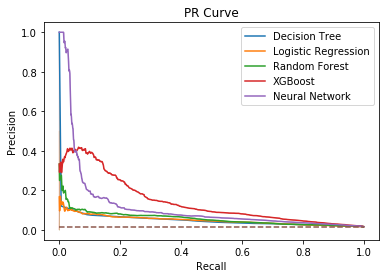

In [272]:
plot_pr(model_results)

As the score of recall increases, the precision of all models decreases dramatically. At the very right side, some models becomes close to the baseline. Given this highly imbalanced dataset, it is all we can do so far.

**For both curves, we can observe Xgboost and NN are better than the rest.** <br>
NN has a high precision when the recall is small, but it does not help. So we should still choose Xgboost.

# Conclusion


Best Model: Xgboost <br>
Accuracy: 0.7622381366709056 <br>
Specificity:  0.7619643245594954 <br>
Recall:  0.779705117085863 <br>
ROC-AUC: 0.8491072260728131 <br>
PR-AUC: 0.14226023665032056 <br>

* XGBoost achieves the best ROC-AUC of 0.85, with a 0.76 accuracy and 0.78 recall. This results indicates that 78% frauds will be successfully detected by our model.
* The PR-AUC of all models are pretty low. By observing the confusion matrix, we can see there are many false positive cases, implying those normal transactions that were misclassified as frauds. In real world, such a high false positive is unaccetable. However, due to the limit of our data information, it is OK for this task.


### Sample Generation
* The imbalance is the No.1 problem we need to handle beside the feature engineering. In particular, I keep the test set unsampled, which is closer to the real dataset in distribution.
* I have tried using the over-sampled data to train the model. However, it didn't perform well and extremely computation-heavy. Therefore I choose the under-sampled data, which can also generate a good classification.


### Model Selection
I tried several classic and today's most popular classifiers. As expected, Xgboost prevails again. Neural network also has a good performance.

### Metrics Selection
- it is again important to choose a good metric with this imbalanced dataset. I chose to use PR-AUC and contruct my own score while doing the GridSearch. It turns out that PR-AUC does seperate Xgboost from other classifiers.

### Possible Improvement with More Time
-Feature engineering for each model. Considering the time constraint and some models' ability to capture feature interactions, I didn't spend much time on feature cross and scaling. Instead, I paid attention to feature extraction. Nevertheless, if given more time, I would do more feature engineering for each model separately.
-More model tuning.<br>
-Try high dimensional feature engineering for logistic and NN, which does not care about high dim.<br>
-Construct sequence feature from the dataset.<br>
Try more over-sampling techniques and keep more data.<br>
